# Análise Exploratória e Previsão de Jogos da NBA

# Objetivo

* Este projeto visa primeiramente realizar uma análise exploratória dos dados obtidos das últimas 6 temporadas regulares da NBA (2017-18 a 2022-23) e treinar uma rede neural com o intuito de prever-se o time vencedor de uma partida.

# Obtenção e manipulação dos dados

* Os dados foram obtidos através da API da NBA, o script 'get_team_stats.py' obtém as médias estatísticas de todos os times após cada jogo da temporada regular das úlitmas 6 temporadas (2017-18 a 2022-23). Ele pode ser oncontrato em:

    - (https://github.com/ArthurPatricio/Final_Project_Basketball_Game_Prediction/blob/main/get_team_stats.py)
<br/><br/>
* O script 'get_games.py' obtém a lista de todos os jogos das últimas 6 temporadas regulares (2017-18 a 2022-23). Ele pode ser encontrado em:

    - (https://github.com/ArthurPatricio/Final_Project_Basketball_Game_Prediction/blob/main/get_games.py)
<br/><br/>
* O script 'organize_data.py' tem os dados dados proveninetes dos 2 scripts anteriores e como suas entradas. Este script reorganiza os dados de forma que cada linha do dataframe seja única, contendo uma das partidas das últimas 6 temporadas regulares do conjunto. Colunas auxiliares foram craidas indicando o número do jogo dentro da temporada para cada time no confronto, por exemplo, um confronto pode uma partida entre de número 50 de um time A na temporada 2022-23 e a partida 48 de um time B que ele enfrenta neste confronto. 

* Os dados também foram trbalhados de forma que foram associados a cada confronto as médias estatísticas dos times. A associação é feita da seguinte forma, para cada confronto cada time recebe as sua médias estatísticas até o momento daquele jogo. Expandindo o exemplo anterior, no confronto entre os times A e B, A irá jogar sua partida de número 50, então chegara com as médias das 49 partidas anteriores a este jogo, já o time B, chegará com as médias das 47 partidas que já jogou na temporada. O script pode ser encontrado em:

    - (https://github.com/ArthurPatricio/Final_Project_Basketball_Game_Prediction/blob/main/organize_data.py)
<br/><br/>
* O último script, 'final_data.py', realiza a mesclagem final dos dados, unindo os confrontos às médias estatísticas do par de times até aquele momento (jogo) da temporada. Os dados são salvos em planilha, chamada 'nba_data.xlsx'. Ele pode ser encontrado em:

    - (https://github.com/ArthurPatricio/Final_Project_Basketball_Game_Prediction/blob/main/final_data.py)

# Linguagem, Bibliotecas e Pacotes

O trabalho foi feito todo em Python 3. Abaixo, segue a listagem de todas bibliotecas e pacotes utilizados:

In [1]:
# Import libs

import numpy as np
import pandas as pd
import missingno as msno
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras import Sequential
from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\arthu\AppData\Local\Temp\ipykernel_45104\2184817312.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Leitura dos Dados

A planilha 'nba_data.xlsx' foi importada e inserida em um Dataframe utilizando a biblioteca pandas.

In [5]:
# Read NBA data from excel file

nba_data = pd.read_excel('nba_data.xlsx')

O dataframe tem a coluna 'Unnamed: 0' retirada.

In [6]:
# Drop "Unnamed: 0" column

nba_data.drop(['Unnamed: 0'], axis=1, inplace=True)

# Análise Inicial

O dataset possui 6963 registros e 132 atributos.

In [4]:
# Get nba_data dataframa shape

nba_data.shape

(6963, 132)

In [7]:
# Get nba_data dataframe columns

nba_data.columns

Index(['HOME_TEAM_ID', 'HOME_TEAM_ABBREVIATION', 'HOME_GAME_ID',
       'HOME_MATCHUP', 'HOME_SEASON', 'HOME_GAME_N', 'HOME_WL', 'AWAY_TEAM_ID',
       'AWAY_TEAM_ABBREVIATION', 'AWAY_GAME_ID',
       ...
       'BLK_RANK_y', 'BLKA_RANK_y', 'PF_RANK_y', 'PFD_RANK_y', 'PTS_RANK_y',
       'PLUS_MINUS_RANK_y', 'GAME_DATE_y', 'SEASON_y', 'GAME_N_y',
       'COMPARE_y'],
      dtype='object', length=132)

In [8]:
# Get nba_data dataframe describe

nba_data.describe()

,HOME_TEAM_ID,HOME_GAME_ID,HOME_GAME_N,AWAY_TEAM_ID,AWAY_GAME_ID,AWAY_GAME_N,TEAM_ID_x,GP_x,W_x,L_x,...,AST_RANK_y,TOV_RANK_y,STL_RANK_y,BLK_RANK_y,BLKA_RANK_y,PF_RANK_y,PFD_RANK_y,PTS_RANK_y,PLUS_MINUS_RANK_y,GAME_N_y
count,6.963000e+03,6.963000e+03,6963.000000,6.963000e+03,6.963000e+03,6963.000000,6.963000e+03,6963.000000,6963.000000,6963.000000,...,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000
mean,1.610613e+09,2.195075e+07,40.421657,1.610613e+09,2.195075e+07,40.431567,1.610613e+09,39.421657,19.688640,19.733017,...,15.345541,15.321844,15.419647,15.286514,15.244004,15.371248,15.439466,15.327876,15.286227,40.431567
std,8.653343e+00,1.743568e+05,22.634354,8.640874e+00,1.743568e+05,22.614953,8.653343e+00,22.634354,13.039842,13.080083,...,8.664255,8.648501,8.662756,8.643116,8.639085,8.656732,8.616650,8.637555,8.633215,22.614953
min,1.610613e+09,2.170002e+07,2.000000,1.610613e+09,2.170002e+07,2.000000,1.610613e+09,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,1.610613e+09,2.180054e+07,21.000000,1.610613e+09,2.180054e+07,21.000000,1.610613e+09,20.000000,9.000000,9.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,21.000000
50%,1.610613e+09,2.200003e+07,40.000000,1.610613e+09,2.200003e+07,40.000000,1.610613e+09,39.000000,18.000000,18.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16.000000,15.000000,15.000000,40.000000
75%,1.610613e+09,2.210070e+07,60.000000,1.610613e+09,2.210070e+07,60.000000,1.610613e+09,59.000000,29.000000,29.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,60.000000
max,1.610613e+09,2.220123e+07,82.000000,1.610613e+09,2.220123e+07,82.000000,1.610613e+09,81.000000,64.000000,64.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,82.000000


In [9]:
# Get classes

nba_data['HOME_WL'].value_counts()

HOME_WL
W    3936
L    3027
Name: count, dtype: int64

In [10]:
# Get nba_data dataframe info

nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6963 entries, 0 to 6962
Columns: 132 entries, HOME_TEAM_ID to COMPARE_y
dtypes: float64(46), int64(68), object(18)
memory usage: 7.0+ MB


# Chegagem de valores nulos

nba_data não possui nenhum valor faltante.

Foi utilizado a biblioteca missingno para realizar a checagem.

<Axes: >

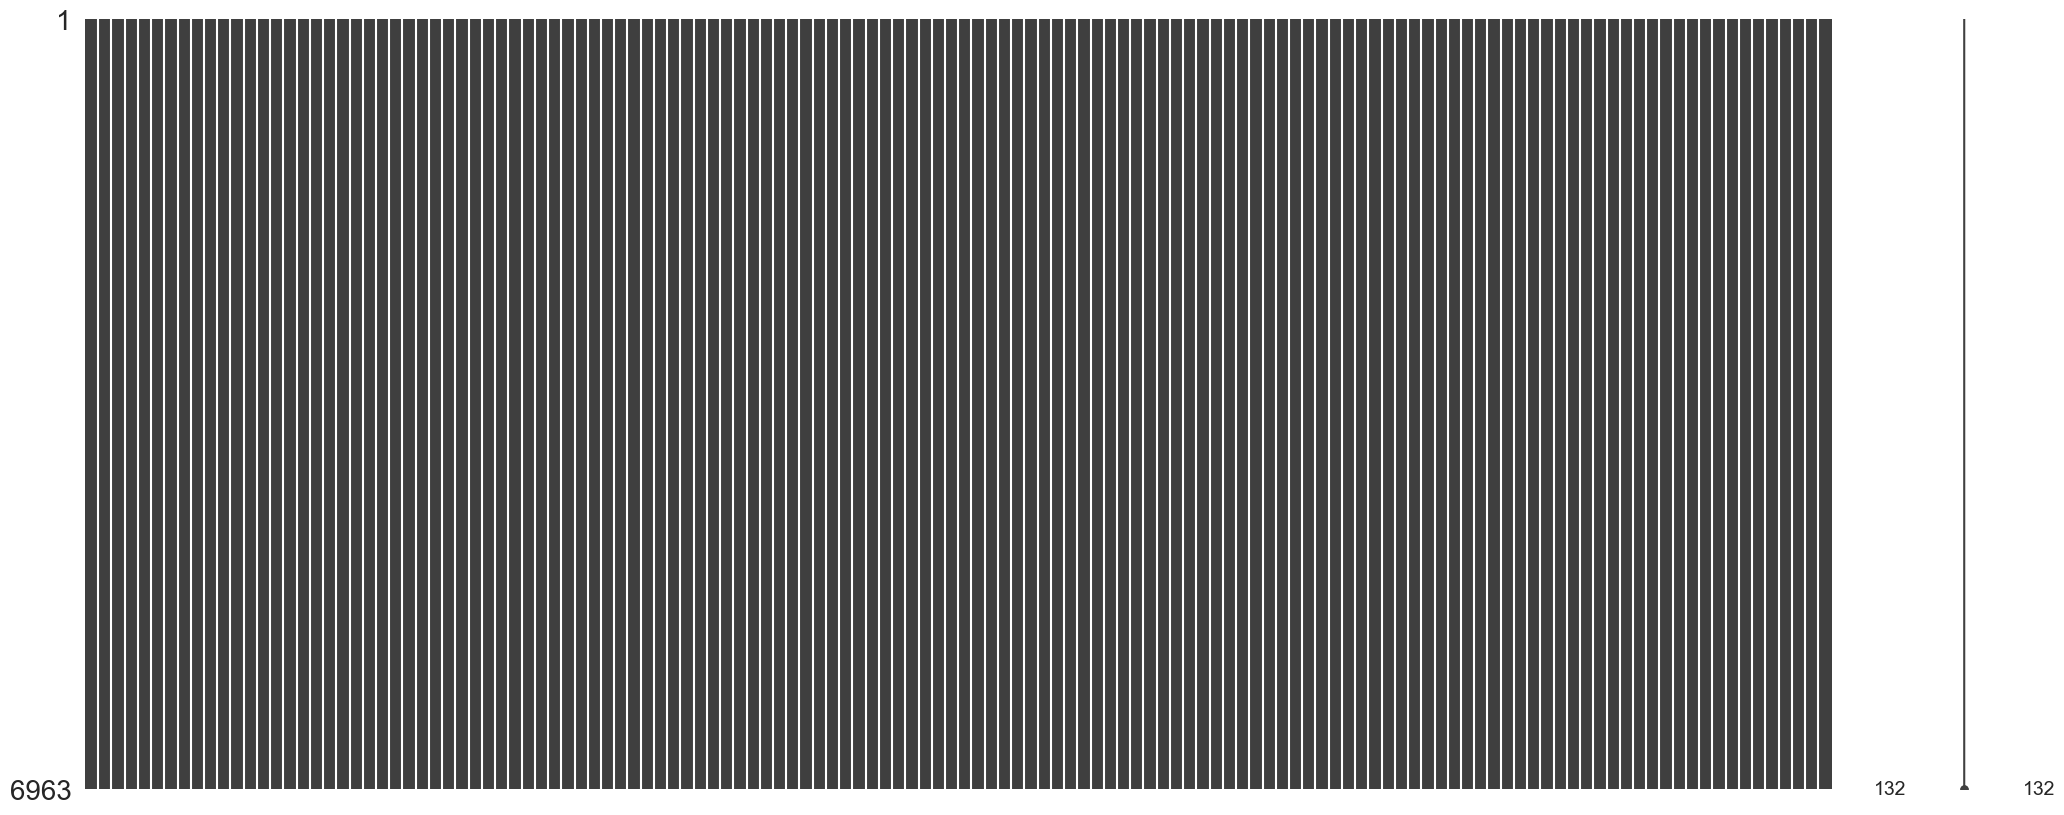

In [11]:
msno.matrix(nba_data)

# Relatório Pandas Profile

Foi gerado o 'Pandas Profile Report' que oferece uma análise extensa do conjunto de dados que está sendo abordado.

In [ ]:
# Generate and export as a .html file the Pandas Profile Report of the nba_shots dataframe

profile_data = ProfileReport(nba_data, title ='nba_data')
profile_data.to_file("nba_data_pandas_profile_report.html")

In [ ]:
# Show Profile Report in this notebook

profile_data.to_notebook_iframe()

# Análise Exploratória


# 1. Vitórias e Derrotas por Time

In [12]:
# Number of games per season

nba_data['HOME_SEASON'].value_counts()

HOME_SEASON
2022-23    1214
2021-22    1214
2018-19    1214
2017-18    1214
2020-21    1064
2019-20    1043
Name: count, dtype: int64

In [11]:
nba_data[nba_data['HOME_SEASON'] == '2022-23']['HOME_WL']

0       W
1       W
2       W
3       L
4       W
       ..
6905    W
6941    W
6942    W
6943    W
6944    L
Name: HOME_WL, Length: 1214, dtype: object

In [12]:
nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'WAS') & (nba_data['HOME_SEASON'] == '2022-23')]['HOME_WL']

0     W
2     W
3     L
5     L
7     L
10    W
11    W
12    W
13    L
14    W
15    W
19    W
22    L
25    L
26    L
33    W
34    W
39    L
40    W
41    L
42    L
44    W
49    L
51    L
52    W
53    W
57    L
60    W
61    L
62    L
64    L
65    L
67    W
69    L
71    L
72    W
74    W
75    L
77    L
79    W
80    L
Name: HOME_WL, dtype: object

In [13]:
nba_data[nba_data['HOME_WL'] == 'W']['HOME_TEAM_ABBREVIATION'].value_counts().index

Index(['DEN', 'MIL', 'PHI', 'BOS', 'UTA', 'TOR', 'GSW', 'MIA', 'LAC', 'MEM',
       'POR', 'LAL', 'DAL', 'BKN', 'IND', 'SAS', 'HOU', 'NOP', 'OKC', 'PHX',
       'MIN', 'ATL', 'CLE', 'WAS', 'SAC', 'CHA', 'CHI', 'NYK', 'ORL', 'DET'],
      dtype='object', name='HOME_TEAM_ABBREVIATION')

Primeiramente, foram plotadas as vitórias e derrotas dos 10 times com melhor performance em jogos em casa nas últimas 6 temporadas apenas para termos uma visualização inicial dos nossos dados. 

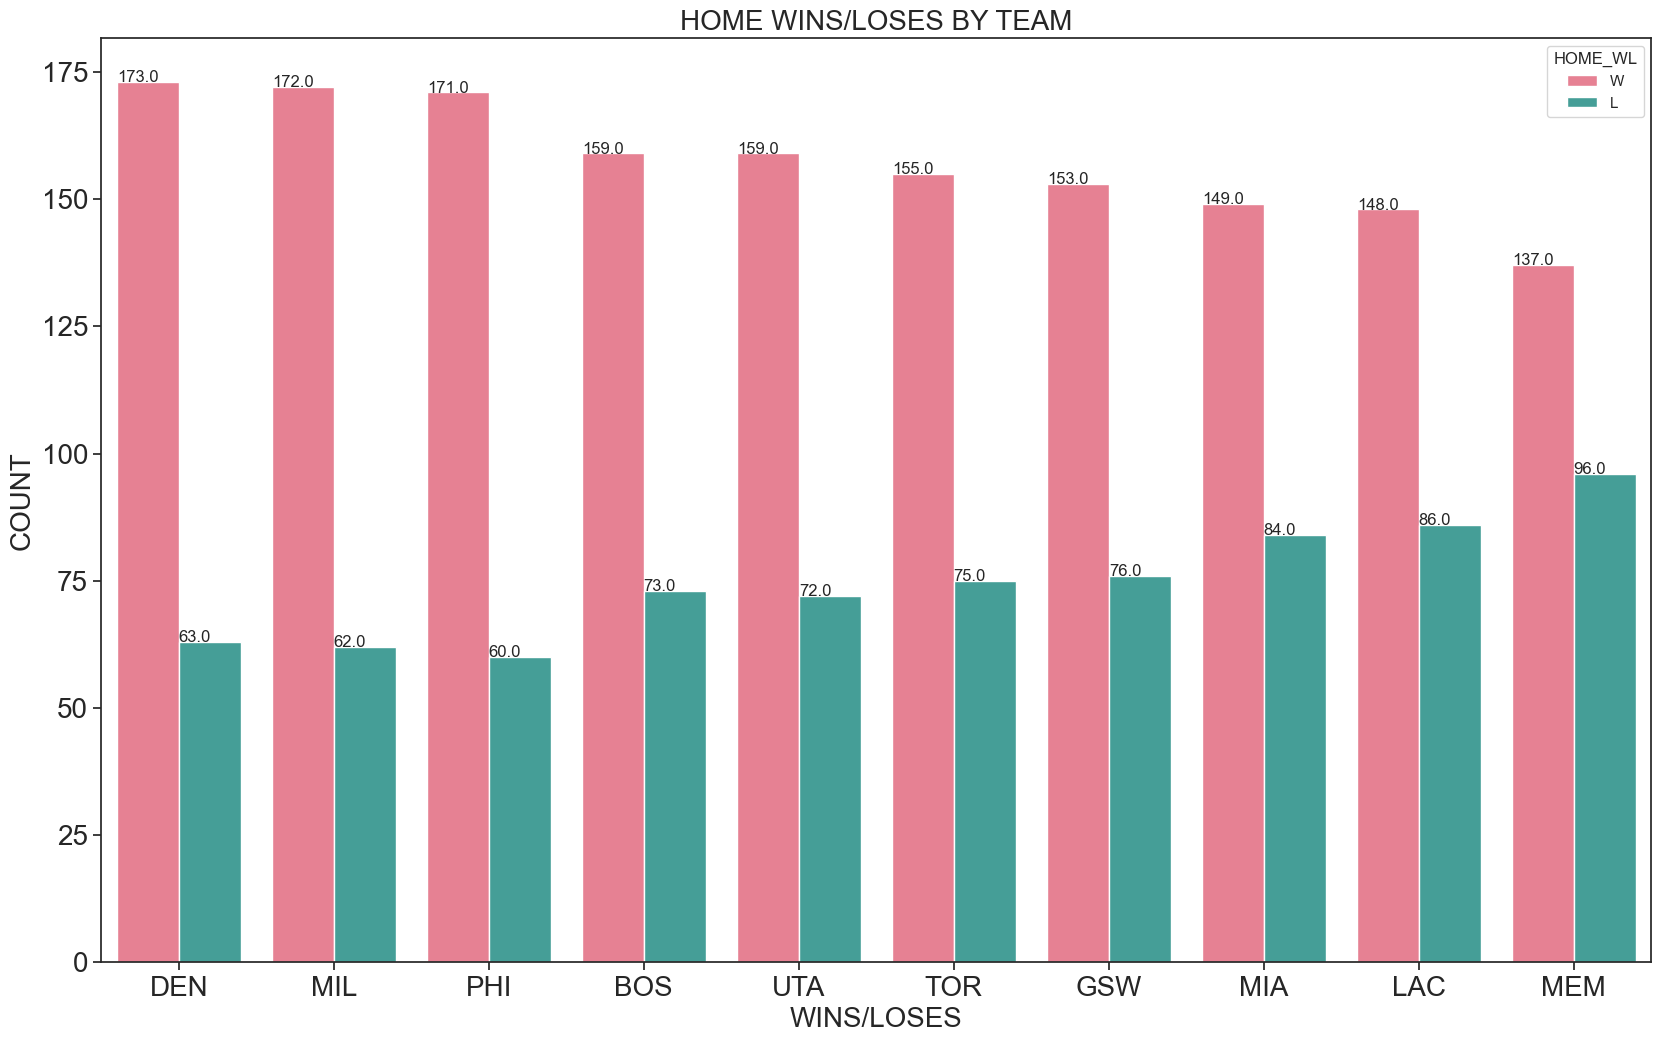

In [13]:
# TEAMS PER HOME WINS/LOSSES BAR PLOT

plt.figure(figsize=(20,12))
fig11 = sns.countplot(data=nba_data, x=nba_data['HOME_TEAM_ABBREVIATION'],
                        palette = 'husl', 
                        hue = nba_data['HOME_WL'],
                        order=nba_data[nba_data['HOME_WL'] == 'W']['HOME_TEAM_ABBREVIATION'].value_counts().iloc[:10].index
                        )
fig11.set_xlabel('WINS/LOSES', fontsize=20)
fig11.set_ylabel('COUNT', fontsize=20)
fig11.tick_params(labelsize=20)
plt.title('HOME WINS/LOSES BY TEAM', fontsize = 20)
for p in fig11.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    fig11.text(txt_x,txt_y,txt)
plt.show()

Também foram plotadas as vitórias e derrotas dos 10 times com melhor performance em jogos fora de casa nas últimas 6 temporadas apenas para termos uma visualização inicial dos nossos dados. 

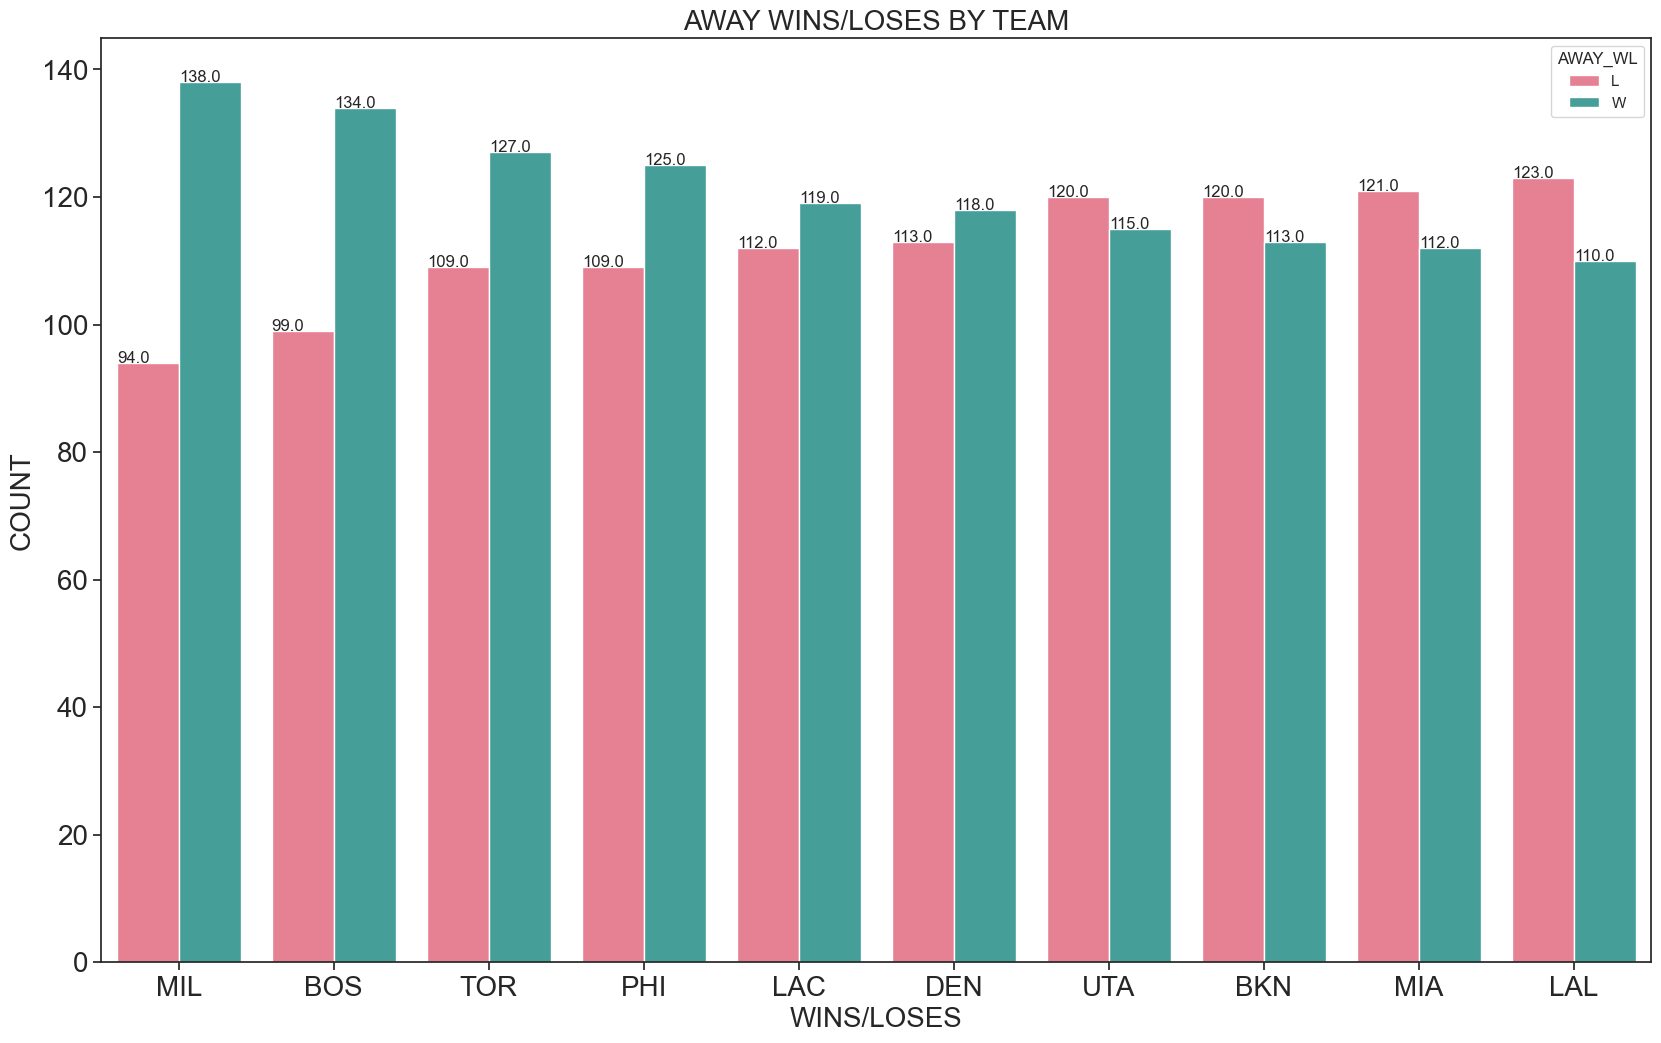

In [14]:
# TEAMS PER AWAY WINS/LOSSES BAR PLOT

plt.figure(figsize=(20,12))
fig2 = sns.countplot(data=nba_data, x=nba_data['AWAY_TEAM_ABBREVIATION'],
                        palette = 'husl', 
                        hue = nba_data['AWAY_WL'],
                        order=nba_data[nba_data['AWAY_WL'] == 'W']['AWAY_TEAM_ABBREVIATION'].value_counts().iloc[:10].index
                        )
fig2.set_xlabel('WINS/LOSES', fontsize=20)
fig2.set_ylabel('COUNT', fontsize=20)
fig2.tick_params(labelsize=20)
plt.title('AWAY WINS/LOSES BY TEAM', fontsize = 20)
for p in fig2.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    fig2.text(txt_x,txt_y,txt)
plt.show()

Analisando os dois gráficos, percebe-se que o fator casa é valioso na NBA. Times tendem a ter melhores resultados quando jogam em seus domínios.

Um novo dataframe, den_home_data, foi criado a partir de um subconjunto de dados formado por todas as partidas em casa do time Denver Nuggets. Denver foi o time com melhor rendimento em casa no período em análise e é o atual campeão da NBA, sagrandro-se campeão da temproada 2022-23.  Então, vamos checá-lo em maior detalhe.

In [15]:
den_home_data = nba_data[nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN']
den_home_data.head()

,HOME_TEAM_ID,HOME_TEAM_ABBREVIATION,HOME_GAME_ID,HOME_MATCHUP,HOME_SEASON,HOME_GAME_N,HOME_WL,AWAY_TEAM_ID,AWAY_TEAM_ABBREVIATION,AWAY_GAME_ID,...,BLK_RANK_y,BLKA_RANK_y,PF_RANK_y,PFD_RANK_y,PTS_RANK_y,PLUS_MINUS_RANK_y,GAME_DATE_y,SEASON_y,GAME_N_y,COMPARE_y
27,1610612743,DEN,22200422,DEN vs. WAS,2022-23,27,W,1610612764,WAS,22200422,...,5,12,7,25,23,25,2022-12-12-2022_23,2022-23,29,29-1610612764-2022-23
107,1610612743,DEN,22100411,DEN vs. WAS,2021-22,27,W,1610612764,WAS,22100411,...,11,8,8,6,23,22,2021-12-11-2021_22,2021-22,28,28-1610612764-2021-22
190,1610612743,DEN,22000502,DEN vs. WAS,2020-21,32,L,1610612764,WAS,22000502,...,30,11,30,1,9,25,2021-02-23-2020_21,2020-21,30,30-1610612764-2020-21
246,1610612743,DEN,21900252,DEN vs. WAS,2019-20,16,W,1610612764,WAS,21900252,...,24,23,17,28,2,16,2019-11-24-2019_20,2019-20,15,15-1610612764-2019-20
380,1610612743,DEN,21801148,DEN vs. WAS,2018-19,76,L,1610612764,WAS,21801148,...,24,8,14,12,7,25,2019-03-29-2018_19,2018-19,78,78-1610612764-2018-19


Vale mencionar que Denver é o time que joga em maior elevação na liga, sua arena fica a 5280 acima do nível do mar. Apesar de não ser uma elevação tão considerável, seus efeitos são históricamente conhecidos como um ponto de vantagem para o time da cidade. [1] 

Abaixo, temos um gráfico que apresenta o histórico de confrontos dos Nuggets em casa dentro do período de 6 em análise, ordenado de melhor a pior retrospécto. Denver se sai melhor contra o Portland Trailblazaer, perdendo apenas um jogo em 12 disputados.

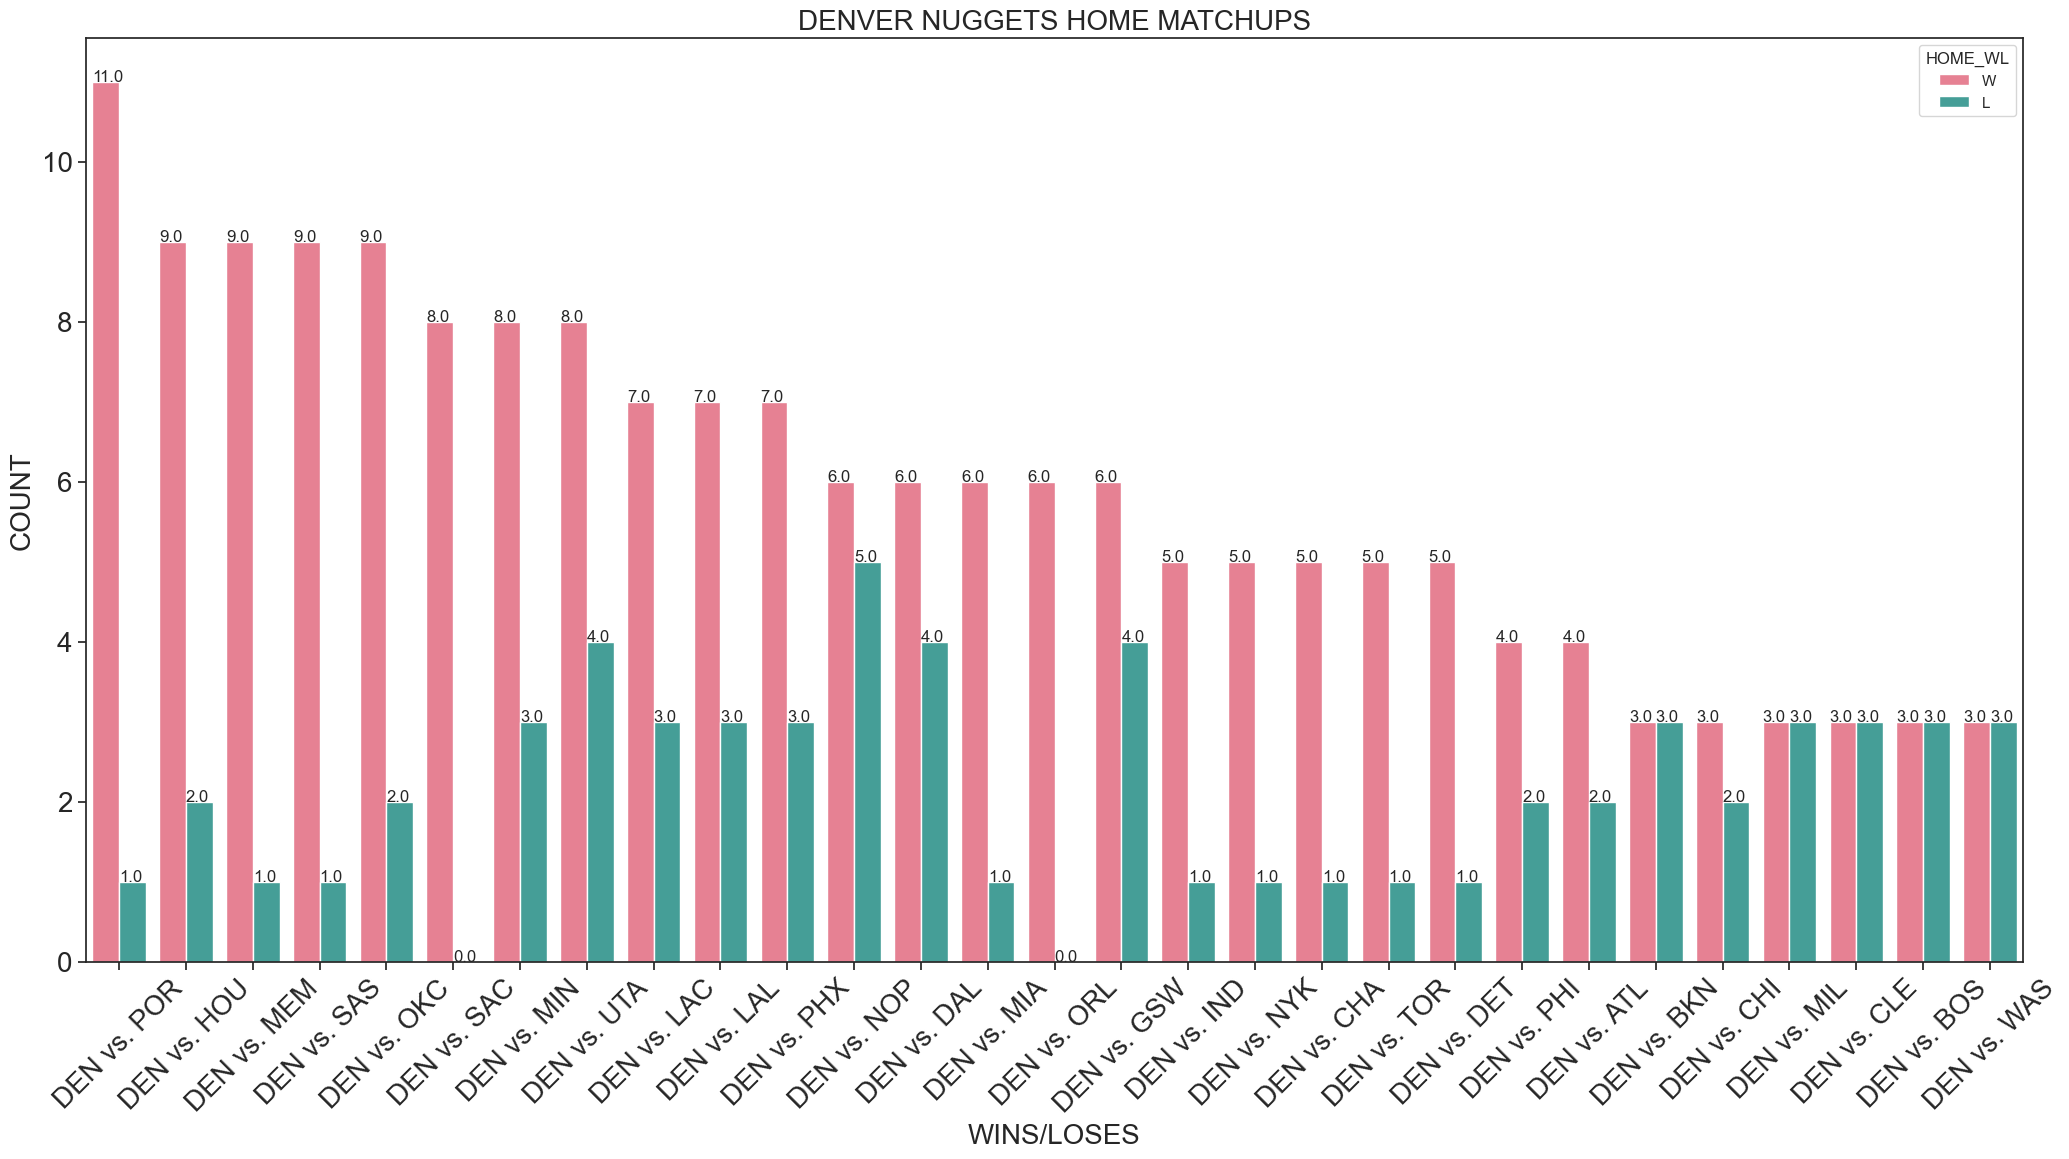

In [17]:
# DENVER NUGGETS HOME MATCHUPS

plt.figure(figsize=(25,12))
fig3 = sns.countplot(data=den_home_data, x=den_home_data['HOME_MATCHUP'],
                        palette = 'husl', 
                        hue = den_home_data['HOME_WL'],
                        order=den_home_data[den_home_data['HOME_WL'] == 'W']['HOME_MATCHUP'].value_counts().index
                        )
fig3.set_xlabel('WINS/LOSES', fontsize=20)
fig3.set_ylabel('COUNT', fontsize=20)
fig3.tick_params(labelsize=20)
plt.title('DENVER NUGGETS HOME MATCHUPS', fontsize = 20)
for p in fig3.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    fig3.text(txt_x,txt_y,txt)
plt.xticks(rotation=45)
plt.show()

Visto que o intuito deste trabalho é prever o vencedor de jogos de NBA utilizandoos dados das temporadas regulares obtidas, abaixo realizamos um estudo de exercício de comparação entre a porcetagem de vitórias 

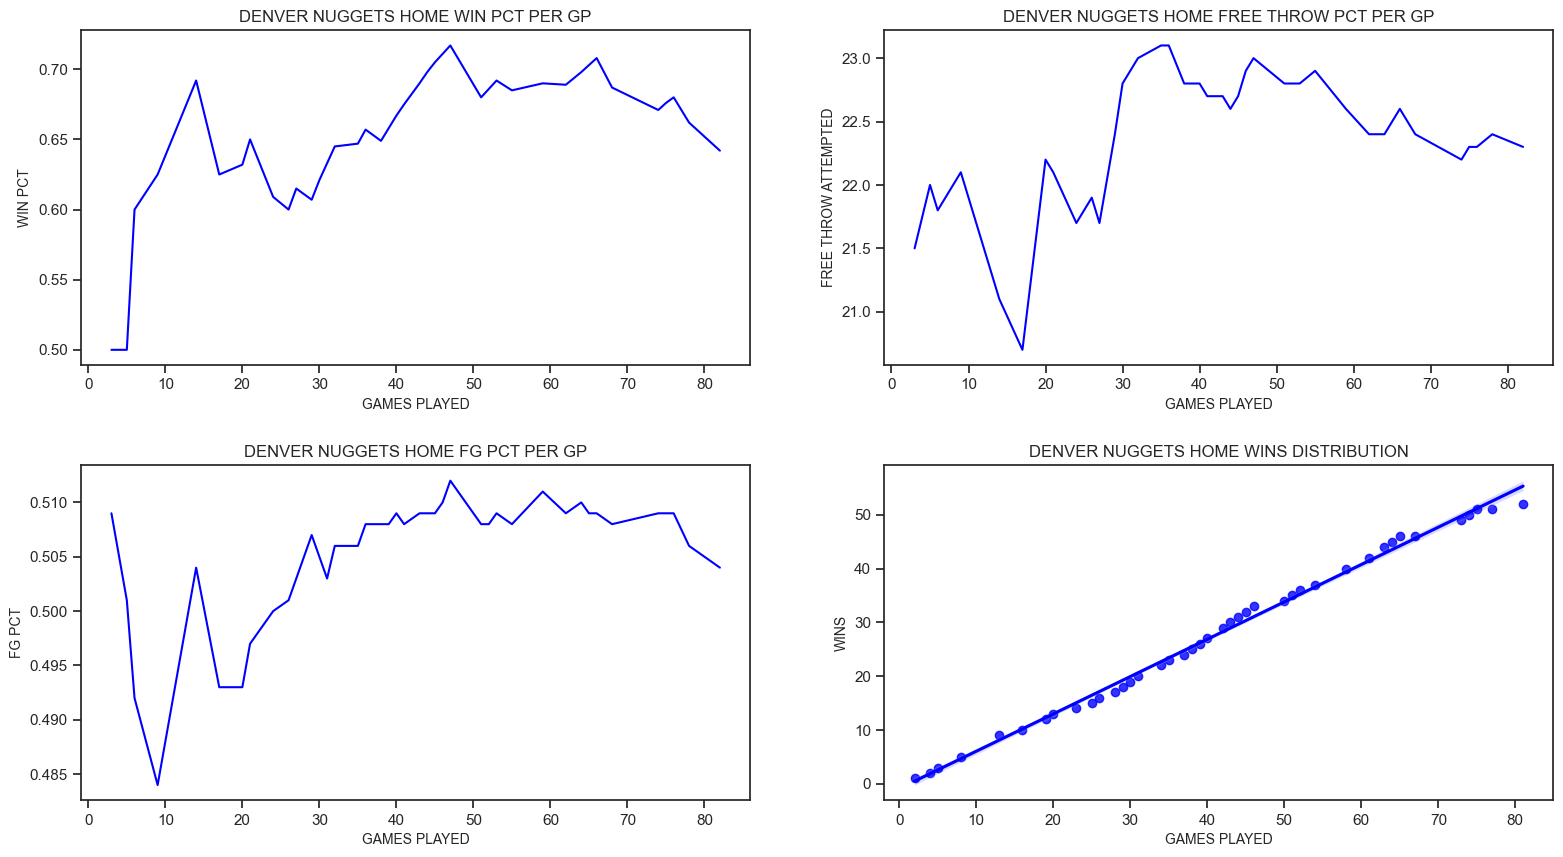

<Figure size 1500x1200 with 0 Axes>

In [41]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(19, 10))

sns.set_theme(style="ticks")

x4 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['GP_x']
y4 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['W_x']

plt.figure(figsize=(15,12))
fig4 = sns.regplot(
                    x=x4,
                    y=y4,
                    color='blue',
                    ax=ax4
                    )
fig4.set_xlabel('GAMES PLAYED', fontsize=10)
fig4.set_ylabel('WINS', fontsize=10)
ax4.set_title('DENVER NUGGETS HOME WINS DISTRIBUTION', fontsize = 12)

x5 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['W_PCT_x']
y5 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['HOME_GAME_N']

fig5 = sns.lineplot(
                    x=y5,
                    y=x5,
                    color='blue',
                    ax = ax1
                    )
                    
fig5.set_xlabel('GAMES PLAYED', fontsize=10)
fig5.set_ylabel('WIN PCT', fontsize=10)
ax1.set_title('DENVER NUGGETS HOME WIN PCT PER GP', fontsize = 12)

x6 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['FTA_x']
y6 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['HOME_GAME_N']

fig6 = sns.lineplot(
                    x=y6,
                    y=x6,
                    color='blue',
                    ax=ax2
                    )
fig6.set_xlabel('GAMES PLAYED', fontsize=10)
fig6.set_ylabel('FREE THROW ATTEMPTED', fontsize=10)
ax2.set_title('DENVER NUGGETS HOME FREE THROW PCT PER GP', fontsize = 12)

x7 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['FG_PCT_x']
y7 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['HOME_GAME_N']

fig7 = sns.lineplot(
                    x=y7,
                    y=x7,
                    color='blue',
                    ax=ax3
                    )
fig7.set_xlabel('GAMES PLAYED', fontsize=10)
fig7.set_ylabel('FG PCT', fontsize=10)
ax3.set_title('DENVER NUGGETS HOME FG PCT PER GP', fontsize = 12)

fig.subplots_adjust(hspace = 0.3)

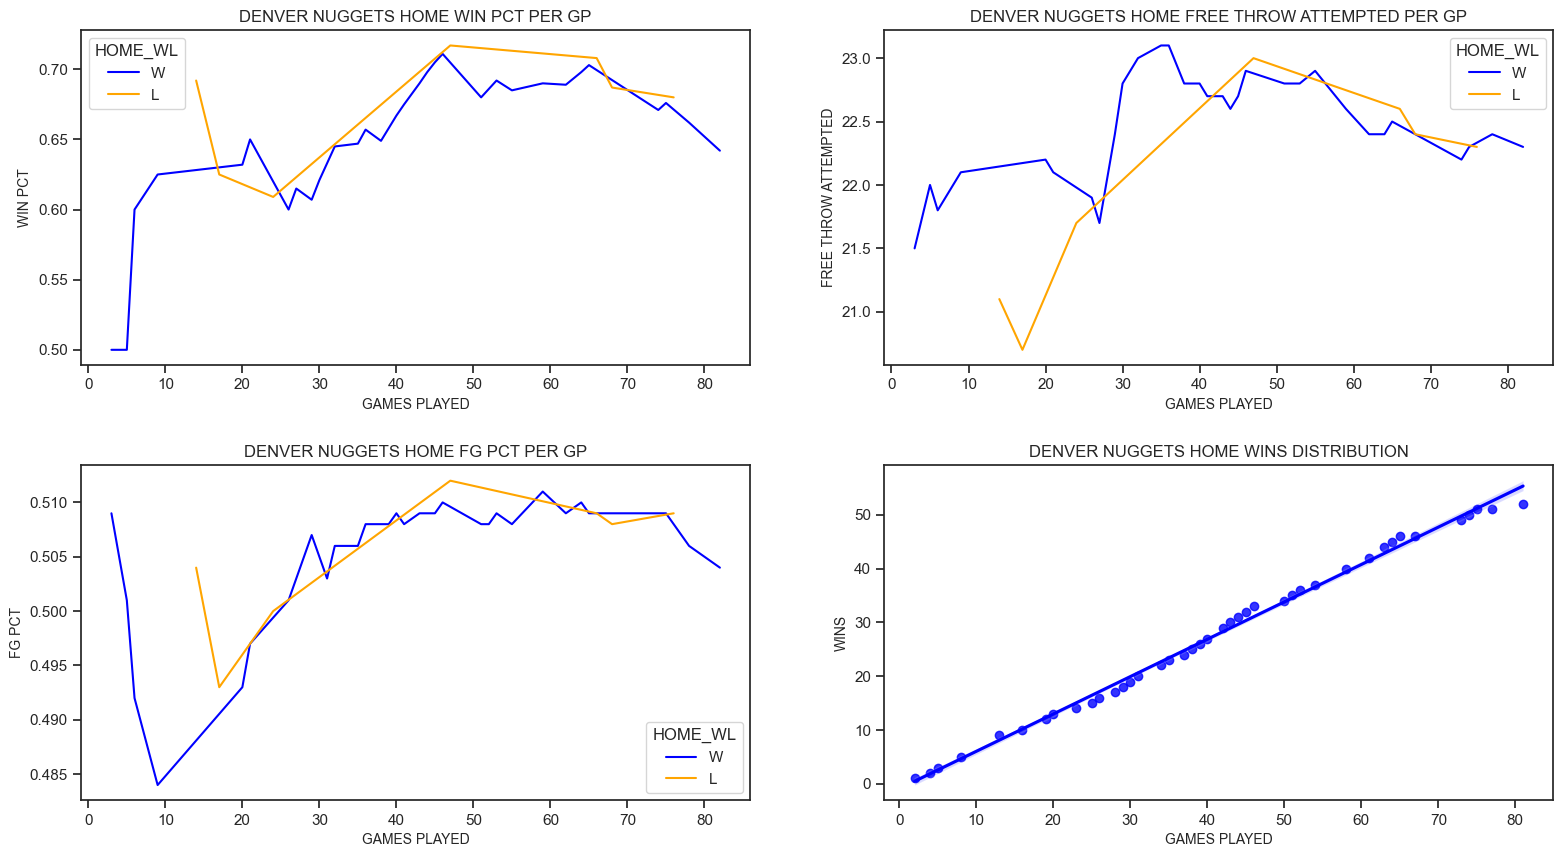

<Figure size 1500x1200 with 0 Axes>

In [42]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(19, 10))

sns.set_theme(style="ticks")

x4 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['GP_x']
y4 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['W_x']

plt.figure(figsize=(15,12))
fig4 = sns.regplot(
                    x=x4,
                    y=y4,
                    color='blue',
                    ax=ax4
                    )
fig4.set_xlabel('GAMES PLAYED', fontsize=10)
fig4.set_ylabel('WINS', fontsize=10)
ax4.set_title('DENVER NUGGETS HOME WINS DISTRIBUTION', fontsize = 12)

x5 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['W_PCT_x']
y5 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['HOME_GAME_N']
z5 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['HOME_WL']


fig5 = sns.lineplot(
                    x=y5,
                    y=x5,
                    color='blue',
                    ax = ax1,
                    hue=z5,
                    palette=['blue', 'orange']
                    )
                    
fig5.set_xlabel('GAMES PLAYED', fontsize=10)
fig5.set_ylabel('WIN PCT', fontsize=10)
ax1.set_title('DENVER NUGGETS HOME WIN PCT PER GP', fontsize = 12)

x6 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['FTA_x']
y6 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['HOME_GAME_N']
z6 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['HOME_WL']

fig6 = sns.lineplot(
                    x=y6,
                    y=x6,
                    color='blue',
                    ax=ax2,
                    hue=z6,
                    palette=['blue', 'orange']
                    )
fig6.set_xlabel('GAMES PLAYED', fontsize=10)
fig6.set_ylabel('FREE THROW ATTEMPTED', fontsize=10)
ax2.set_title('DENVER NUGGETS HOME FREE THROW ATTEMPTED PER GP', fontsize = 12)

x7 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['FG_PCT_x']
y7 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['HOME_GAME_N']
z7 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DEN') & (nba_data['HOME_SEASON'] == '2022-23')]['HOME_WL']

fig7 = sns.lineplot(
                    x=y7,
                    y=x7,
                    color='blue',
                    ax=ax3,
                    hue=z7,
                    palette=['blue', 'orange']
                    )
fig7.set_xlabel('GAMES PLAYED', fontsize=10)
fig7.set_ylabel('FG PCT', fontsize=10)
ax3.set_title('DENVER NUGGETS HOME FG PCT PER GP', fontsize = 12)

fig.subplots_adjust(hspace = 0.3)

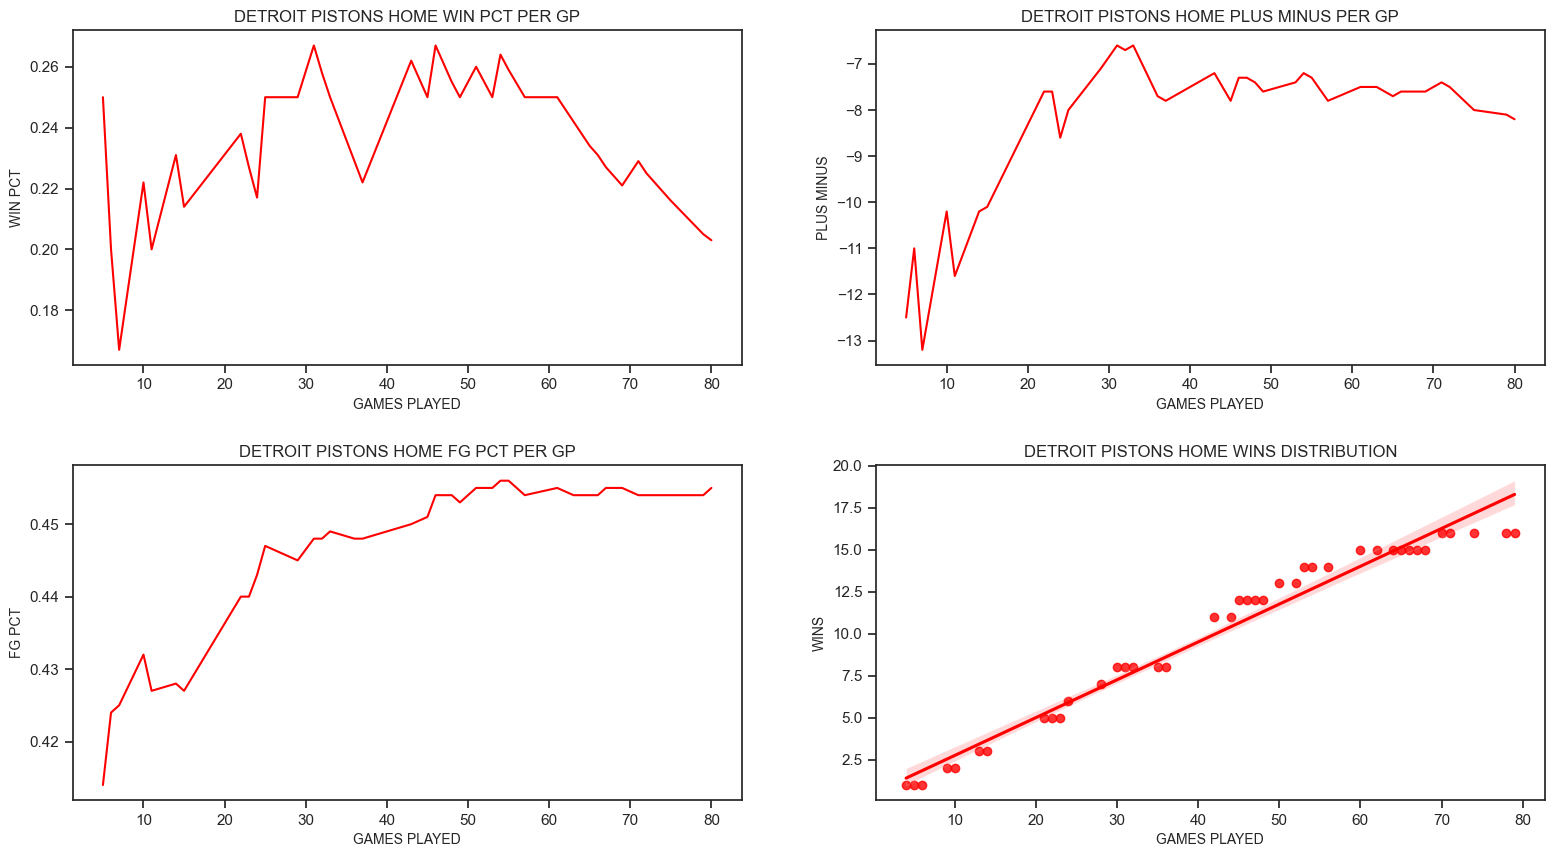

<Figure size 1900x1200 with 0 Axes>

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(19, 10))

sns.set_theme(style="ticks")

x8 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DET') & (nba_data['HOME_SEASON'] == '2022-23')]['GP_x']
y8 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DET') & (nba_data['HOME_SEASON'] == '2022-23')]['W_x']

plt.figure(figsize=(19,12))
fig8 = sns.regplot(
                    x=x8,
                    y=y8,
                    color='red',
                    ax=ax4
                    )
fig8.set_xlabel('GAMES PLAYED', fontsize=10)
fig8.set_ylabel('WINS', fontsize=10)
ax4.set_title('DETROIT PISTONS HOME WINS DISTRIBUTION', fontsize = 12)

x9 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DET') & (nba_data['HOME_SEASON'] == '2022-23')]['W_PCT_x']
y9 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DET') & (nba_data['HOME_SEASON'] == '2022-23')]['HOME_GAME_N']


fig9 = sns.lineplot(
                    x=y9,
                    y=x9,
                    color='red',
                    ax = ax1
                    )
                    
fig9.set_xlabel('GAMES PLAYED', fontsize=10)
fig9.set_ylabel('WIN PCT', fontsize=10)
ax1.set_title('DETROIT PISTONS HOME WIN PCT PER GP', fontsize = 12)

x10 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DET') & (nba_data['HOME_SEASON'] == '2022-23')]['PLUS_MINUS_x']
y10 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DET') & (nba_data['HOME_SEASON'] == '2022-23')]['HOME_GAME_N']

fig10 = sns.lineplot(
                    x=y10,
                    y=x10,
                    color='red',
                    ax=ax2
                    )
fig10.set_xlabel('GAMES PLAYED', fontsize=10)
fig10.set_ylabel('PLUS MINUS', fontsize=10)
ax2.set_title('DETROIT PISTONS HOME PLUS MINUS PER GP', fontsize = 12)

x11 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DET') & (nba_data['HOME_SEASON'] == '2022-23')]['FG_PCT_x']
y11 = nba_data[(nba_data['HOME_TEAM_ABBREVIATION'] == 'DET') & (nba_data['HOME_SEASON'] == '2022-23')]['HOME_GAME_N']

fig11 = sns.lineplot(
                    x=y11,
                    y=x11,
                    color='red',
                    ax=ax3
                    )
fig11.set_xlabel('GAMES PLAYED', fontsize=10)
fig11.set_ylabel('FG PCT', fontsize=10)
ax3.set_title('DETROIT PISTONS HOME FG PCT PER GP', fontsize = 12)

fig.subplots_adjust(hspace = 0.3)

# Previsão de resultados utilizando Redes Neurais

In [25]:
# Drop Columns

nba_data.drop(nba_data.columns[[0,1,2,3,4,5,7,8,9,10,11,12,13,14,
                                  15,16,17,70,71,72,73,74,75,128,129,130,131]], axis=1, inplace=True)

nba_data.to_excel('test_table.xlsx')

In [26]:
# Turn categorical column HOME_WL into numerial

nba_data['HOME_WL'] = nba_data['HOME_WL'].apply(lambda x: 0 if x == 'W' else 1)
nba_data.head()

,HOME_WL,GP_x,W_x,L_x,W_PCT_x,MIN_x,FGM_x,FGA_x,FG_PCT_x,FG3M_x,...,REB_RANK_y,AST_RANK_y,TOV_RANK_y,STL_RANK_y,BLK_RANK_y,BLKA_RANK_y,PF_RANK_y,PFD_RANK_y,PTS_RANK_y,PLUS_MINUS_RANK_y
0,0,1,1,0,1.000,48.0,42.0,92.0,0.457,11.0,...,12,15,14,2,6,2,25,8,8,7
1,0,2,1,1,0.500,48.0,43.0,81.0,0.531,13.0,...,10,17,24,21,2,7,7,27,18,9
2,0,3,2,1,0.667,49.7,42.0,86.3,0.486,11.0,...,8,9,9,14,28,30,10,7,17,27
3,1,4,3,1,0.750,49.3,42.5,86.0,0.494,10.8,...,9,7,16,26,3,21,23,17,11,25
4,0,5,3,2,0.600,49.0,41.6,86.0,0.484,15.2,...,24,14,23,21,5,7,19,23,20,11


In [27]:
# Separate database in train and test

X = nba_data.loc[:, nba_data.columns != 'HOME_WL']
y = nba_data['HOME_WL']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.3, 
                                                    random_state = 100, 
                                                    stratify = y,
                                                    )

In [28]:
# Check columns with variance equal to zero and drop them

zero_var_filter = VarianceThreshold()
X_train = zero_var_filter.fit_transform(X_train)
X_test = zero_var_filter.transform(X_test)
print('X_train e X_test possuíam', (zero_var_filter.variances_ == 0).sum(), 'atributo(s) com variância igual a zero \n')

print(zero_var_filter.variances_ == 0, '\n')

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train e X_test possuíam 0 atributo(s) com variância igual a zero 

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False] 

X_train: (4874, 104)
X_test: (2089, 104)
y_train: (4874,)
y_test: (2089,)


In [29]:
# Normalize data

preprocessParams = preprocessing.StandardScaler().fit(X_train)
X_train_normalized = preprocessParams.transform(X_train)
X_test_normalized = preprocessParams.transform(X_test)

X_train_normalized

array([[-0.19390183, -0.51290067,  0.17945249, ..., -0.17228294,
        -0.60944706,  0.07584392],
       [-1.61094241, -1.43070805, -1.36273462, ...,  1.22296558,
         0.88705677,  1.1184542 ],
       [-1.21239975, -1.43070805, -0.66875042, ...,  0.06025848,
        -1.18502546, -1.19845753],
       ...,
       [ 0.95744365,  0.94029435,  0.71921797, ..., -1.21871934,
        -1.06990978,  1.00260862],
       [ 0.69174854,  1.47568199, -0.28320365, ...,  0.87415345,
         1.46263517,  0.53922627],
       [-1.38952982, -1.12477225, -1.28562526, ..., -1.21871934,
         0.19636269, -1.31430312]])

In [30]:
# Train Neural Network

NumberOfClasses = len(y_train.unique())
NumberOfClasses

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
print(y_train)

[0 0 0 ... 1 0 1]


In [31]:
# Neural Network

RN = Sequential()
RN.add(Dense(25,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
RN.add(Dense(12,activation = 'sigmoid'))
RN.add(Dense(5,activation = 'sigmoid'))
RN.add(Dense(NumberOfClasses,activation = 'sigmoid'))
RN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                2625      
                                                                 
 dense_1 (Dense)             (None, 12)                312       
                                                                 
 dense_2 (Dense)             (None, 5)                 65        
                                                                 
 dense_3 (Dense)             (None, 2)                 12        
                                                                 
Total params: 3014 (11.77 KB)
Trainable params: 3014 (11.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Training

accuracy_threshold = 0.65

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('accuracy') is not None and logs.get('accuracy') >= accuracy_threshold) :
            print('\nReached 65.0% accuracy.')
            self.model.stop_training = True

callbacks = myCallback()

RN.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy']) 
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs = 630, 
                    batch_size=32, validation_split=0.3, callbacks = [callbacks])

Epoch 1/630
107/107 [==============================] - 1s 4ms/step - loss: 0.6956 - accuracy: 0.5702 - val_loss: 0.7002 - val_accuracy: 0.5537
Epoch 2/630
107/107 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5702 - val_loss: 0.6958 - val_accuracy: 0.5537
Epoch 3/630
107/107 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5702 - val_loss: 0.6933 - val_accuracy: 0.5537
Epoch 4/630
107/107 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5702 - val_loss: 0.6918 - val_accuracy: 0.5537
Epoch 5/630
107/107 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5702 - val_loss: 0.6908 - val_accuracy: 0.5537
Epoch 6/630
107/107 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5702 - val_loss: 0.6902 - val_accuracy: 0.5537
Epoch 7/630
107/107 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5702 - val_loss: 0.6898 - val_accuracy: 0.5537

In [33]:
# Evaluation

score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test loss score:', score[0])
print('Test accuracy:', score[1])

Test loss score: 0.6395420432090759
Test accuracy: 0.6428913474082947


In [34]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


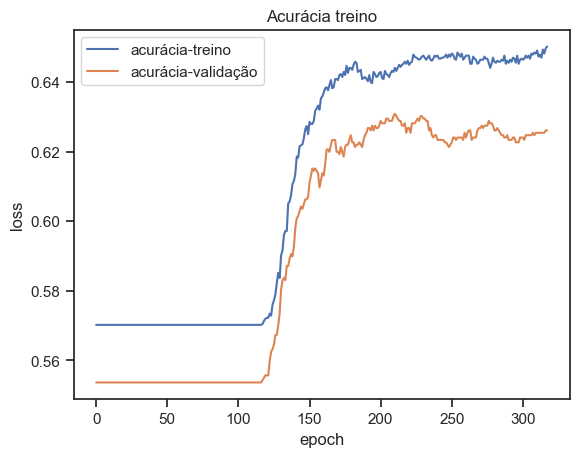

In [35]:
# Training chart: Training and validation per loss and epochs

#plt.plot(history.history['loss'], label='perda-treino')
#plt.plot(history.history['val_loss'], label='validação')
plt.plot(history.history['accuracy'], label='acurácia-treino')
plt.plot(history.history['val_accuracy'], label='acurácia-validação')
plt.title('Acurácia treino')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

# REFERÊNCIAS

1 https://english.elpais.com/sports/2023-06-03/mile-high-nba-advantage-denver-altitude-helps-nuggets-go-unbeaten-at-home-in-playoffs.html